In [174]:
import os
import copy as cp
import csv
import pandas as pd
from sparta.Auxil.PeriodicityDetector import PeriodicityDetector
from sparta.UNICOR.Spectrum import Spectrum
from sparta.UNICOR.Template import Template
from sparta.Auxil.TimeSeries import TimeSeries
from sparta.Observations import Observations
import numpy as np
import matplotlib.pyplot as plt

In [258]:
# DATA PARAMETERS

survey = "HERMES" # survey name
sample_rate = 1 # sample rate of the data
min_wv = 3800 # minimum wavelength of the data
max_wv = 8800 # maximum wavelength of the data
spec_dir = r"C:\Users\kentb\Desktop\PDM\data\Hermes\zetGem_Hermes_spectra" # directory of the spectrum
obs_data = Observations(survey=survey, sample_rate=sample_rate, min_wv=min_wv, max_wv=max_wv,
                        target_visits_lib=spec_dir)

rv_dir =  r"C:\Users\kentb\Desktop\PDM\data\RV\zetGem_rv.csv"  # directory of the RVs
df = pd.read_csv(rv_dir)
rv = df.rv.astype(float).values
e_rv = df.rv_err.astype(float).values
times = df.bjd.astype(float).values
unique_id = True
if survey == "CORALIE":
    try:
        ids = df.unique_id.astype(str).values
    except AttributeError:
        print("No unique_id column in the RV file, using bjd instead")
        unique_id = False
        ids = None
        times = times - int(min(times))
        print(times)
        print(obs_data.time_series.times)
elif survey == "HERMES":
    ids = df.unique_id.astype(int).values
print(len(rv))
print(len(obs_data.time_series.times))
# obs_data.rearrange_time_series(rv=rv, times=times,ids=ids,unique_id=unique_id)
print(len(obs_data.time_series.times))

let's goooo
Using target_visits_lib: C:\Users\kentb\Desktop\PDM\data\Hermes\zetGem_Hermes_spectra
Selected directory: C:\Users\kentb\Desktop\PDM\data\Hermes\zetGem_Hermes_spectra
46
47
47


In [257]:
qz_csv_dir = r'C:\Users\kentb\Desktop\PDM\thesis\main\testing_rassine\TUCas_csv'
qz_rassine_dir = r'C:\Users\kentb\Desktop\PDM\thesis\main\testing_rassine\TUCas_output'

# get all file names, remove the extension for csv files and remove the everything and the extension before the first underscore for rassine files
qz_csv_files = [os.path.splitext(file)[0] for file in os.listdir(qz_csv_dir)]
qz_rassine_files = [file.split("_", 1)[1] for file in os.listdir(qz_rassine_dir)]
qz_rassine_files = [os.path.splitext(file)[0] for file in qz_rassine_files]

# check which ones are missing

missing = []
for file in qz_csv_files:
    if file not in qz_rassine_files:
        missing.append(file)
print(len(missing))
print(missing)

# make a new folder and put the missing csv files in there

missing_dir = r'C:\Users\kentb\Desktop\PDM\thesis\main\testing_rassine\QZNor_missing'
for file in missing:
    os.rename(os.path.join(qz_csv_dir, file + '.csv'), os.path.join(missing_dir, file + '.csv'))

9
['373467', '373556', '373557', '386262', '441812', '442189', '443728', '443735', '443742']


In [259]:
#Store each observation in a csv file.
for spec,unique_id in zip(obs_data.time_series.vals,obs_data.unique_ids):
    wave = spec.wv[0]
    flux = spec.sp[0]
    with open(r"C:\Users\kentb\Desktop\PDM\thesis\main\testing_rassine\zetGem_csv\%s.csv" % unique_id, 'w', newline='') as csvfile:
        writer = csv.writer(csvfile, delimiter=',')
        writer.writerow(['wave', 'flux'])
        writer.writerows(zip(wave, flux))

In [11]:
# import os
# import shutil

# folder_path = 'C:\\Users\\kentb\\Desktop\\PDM\\data\\Hermes\\alfUMi_Hermes_spectra'  # Replace with the path to your folder

# # Iterate through all files in the folder and its subfolders
# for root, dirs, files in os.walk(folder_path):
#     for file in files:
#         file_path = os.path.join(root, file)

#         # Check if the file name doesn't end with 'log_merged_c'
#         if not file.lower().endswith('log_merged_c.fits'):
#             try:
#                 # Delete the file
#                 # print(f'Deleted: {file_path}')
#                 os.remove(file_path)
#                 print(f'Deleted: {file_path}')
#             except Exception as e:
#                 print(f'Error deleting {file_path}: {e}')

Deleted: C:\Users\kentb\Desktop\PDM\data\Hermes\alfUMi_Hermes_spectra\20230615\reduced\01073787_HRF_FF_COP.fits
Deleted: C:\Users\kentb\Desktop\PDM\data\Hermes\alfUMi_Hermes_spectra\20230615\reduced\01073787_HRF_FF_ext.fits
Deleted: C:\Users\kentb\Desktop\PDM\data\Hermes\alfUMi_Hermes_spectra\20230615\reduced\01073787_HRF_FF_extAndShifted.fits
Deleted: C:\Users\kentb\Desktop\PDM\data\Hermes\alfUMi_Hermes_spectra\20230615\reduced\01073787_HRF_FF_extVar.fits
Deleted: C:\Users\kentb\Desktop\PDM\data\Hermes\alfUMi_Hermes_spectra\20230615\reduced\01073787_HRF_FF_extVarAndShifted.fits
Deleted: C:\Users\kentb\Desktop\PDM\data\Hermes\alfUMi_Hermes_spectra\20230615\reduced\01073787_HRF_FF_modOrdpos.fits
Deleted: C:\Users\kentb\Desktop\PDM\data\Hermes\alfUMi_Hermes_spectra\20230615\reduced\01073787_HRF_FF_mslit.fits
Deleted: C:\Users\kentb\Desktop\PDM\data\Hermes\alfUMi_Hermes_spectra\20230615\reduced\01073787_HRF_FF_templateordercenters.fits
Deleted: C:\Users\kentb\Desktop\PDM\data\Hermes\alfUM

In [90]:
import fileinput
import subprocess

In [91]:
def modify_and_run(file_path, line_number, new_content):
    # Read the content of the file
    with fileinput.FileInput(file_path, inplace=True, backup=".bak") as file:
        for i, line in enumerate(file, start=1):
            # Modify the specified line
            if i == line_number:
                print(new_content)
            else:
                print(line, end="")

    # Run the modified file
    subprocess.run(["python", r"C:\Users\kentb\Desktop\PDM\thesis\main\testing_rassine\Rassine.py"])
    print("Done")

In [92]:
csv_dir = r"C:\Users\kentb\Desktop\PDM\thesis\main\testing_rassine\delCep_csv"
import time
start = time.time()
for file in os.listdir(csv_dir):
    file_path = os.path.join(csv_dir, file)
    file_path = file_path.replace("\\","/")
    file_path = file_path.split("/")[-1]
    file_path = '/'+file_path
    print(file_path)
    modify_and_run(r"C:\Users\kentb\Desktop\PDM\thesis\main\testing_rassine\Rassine_config.py", 28, 'spectrum_name = cwd+"/delCep_csv" + "%s"' % file_path)
stop = time.time()
print(stop-start)

/373279.csv
Done
/373280.csv
Done
/373281.csv
Done
/373371.csv
Done
/373372.csv
Done
/373457.csv
Done
/373458.csv
Done
/373459.csv
Done
/373547.csv
Done
/373548.csv
Done
/373549.csv
Done
/388335.csv
Done
/388336.csv
Done
/388337.csv
Done
/388535.csv
Done
/388536.csv
Done
/388537.csv
Done
/388729.csv
Done
/388730.csv
Done
/388731.csv
Done
/388862.csv
Done
/388863.csv
Done
/388864.csv
Done
/388952.csv
Done
/388953.csv
Done
/388954.csv
Done
/389044.csv
Done
/389045.csv
Done
/389046.csv
Done
/441796.csv
Done
/441800.csv
Done
/441810.csv
Done
/442182.csv
Done
/442191.csv
Done
/442196.csv
Done
/442380.csv
Done
/442386.csv
Done
/442390.csv
Done
/442699.csv
Done
/442703.csv
Done
/442707.csv
Done
/443168.csv
Done
/443171.csv
Done
/443175.csv
Done
/443502.csv
Done
/443506.csv
Done
/443509.csv
Done
/443722.csv
Done
/443734.csv
Done
/444097.csv
Done
/444102.csv
Done
/444105.csv
Done
/444357.csv
Done
/444362.csv
Done
/444365.csv
Done
/491601.csv
Done
/491606.csv
Done
/491625.csv
Done
/491639.csv
Do

In [6]:
# PERIODOGRAM PARAMETERS

baseline = np.max(obs_data.time_series.times) - np.min(obs_data.time_series.times) # baseline of the data
min_freq = 2/baseline # Or maybe 1/2/baseline to be sure but let's test it that way.
max_freq = 1/2 # depends on the star.
freq_range = (min_freq, max_freq) # frequency range of the periodograms
points_per_peak = 10
periodogram_grid_resolution = points_per_peak*max_freq*baseline # frequency resolution of the periodograms

# RESULS DIRECTORY

results_dir = r'C:\Users\kentb\Desktop\PDM\thesis\main\testing_rassine' # directory of the results

In [7]:
## Compute periodograms

# Choosing frequency range and frequency resolution for the periodograms.
obs_data.initialize_periodicity_detector(freq_range=freq_range,periodogram_grid_resolution=periodogram_grid_resolution)

obs_data.periodicity_detector.calc_GLS()

print("GLS done",flush=True)

obs_data.periodicity_detector.calc_PDC(calc_biased_flag=False, calc_unbiased_flag=True)

print("PDC done",flush=True)

obs_data.periodicity_detector.calc_USURPER(calc_biased_flag=False, calc_unbiased_flag=True)

print("USURPER done",flush=True)

obs_data.periodicity_detector.calc_partial_periodogram(partial_type="shape")

print("Shape done",flush=True)

obs_data.periodicity_detector.calc_partial_periodogram(partial_type="shift")

print("Shift done",flush=True)

GLS done
PDC done
USURPER done
Shape done
Shift done


In [8]:
# Save the observations instance in a csv file with the name of the spec_dir name in the results directory

with open(os.path.join(results_dir, f"{spec_dir.rsplit('/',maxsplit=1)[-1]}_{str(min_wv)}_{str(max_wv)}_rassine_complete.csv"), 'w',newline='',encoding='utf-8') as csvfile:
    writer = csv.writer(csvfile, delimiter=',')
    writer.writerow(["freq", "gls","usurper","pdc_unbiased","shape_periodogram", "shift_periodogram"])
    for i in range(len(obs_data.periodicity_detector.results_frequency['GLS'])):
        writer.writerow([obs_data.periodicity_detector.results_frequency['GLS'][i],
                        obs_data.periodicity_detector.results_power['GLS'][i],
                        obs_data.periodicity_detector.results_power['USURPER'][i],
                        obs_data.periodicity_detector.results_power['PDC_unbiased'][i],
                        obs_data.periodicity_detector.results_power['shape_periodogram'][i],
                        obs_data.periodicity_detector.results_power['shift_periodogram'][i]])

In [5]:
#replace in obs_data.time_series.vals the flux by the flux/continuum

for idx, file in enumerate(os.listdir('alfUMi_output')):
    file_path = os.path.join('alfUMi_output', file)
    unique_id=file.split('.')[0]
    unique_id=unique_id.split('_')[-1]
    rassine_spec = pd.read_pickle(file_path)
    flux = rassine_spec['flux']/rassine_spec['output']['continuum_linear']
    for idx2,_ in enumerate(obs_data.time_series.vals):
        if str(obs_data.unique_ids[idx2]) == unique_id:
            print(obs_data.unique_ids[idx2],unique_id," ok")
            obs_data.time_series.vals[idx2].sp[0] = flux
    

1000359 1000359  ok
1000923 1000923  ok
1001357 1001357  ok
1001770 1001770  ok
1002773 1002773  ok
1002896 1002896  ok
1003148 1003148  ok
1003484 1003484  ok
1003485 1003485  ok
1004349 1004349  ok
1015022 1015022  ok
1015411 1015411  ok
1018970 1018970  ok
1019122 1019122  ok
1022101 1022101  ok
1022211 1022211  ok
1024858 1024858  ok
1030535 1030535  ok
1030558 1030558  ok
1030643 1030643  ok
1030652 1030652  ok
1030757 1030757  ok
1030873 1030873  ok
1030889 1030889  ok
1030988 1030988  ok
1031176 1031176  ok
1031360 1031360  ok
1031560 1031560  ok
1032260 1032260  ok
1032365 1032365  ok
1033075 1033075  ok
1035841 1035841  ok
1036193 1036193  ok
1036445 1036445  ok
1036756 1036756  ok
1037057 1037057  ok
1037495 1037495  ok
1037808 1037808  ok
1038684 1038684  ok
1040706 1040706  ok
1045229 1045229  ok
1045613 1045613  ok
1046136 1046136  ok
1046282 1046282  ok
1047155 1047155  ok
1051126 1051126  ok
1051219 1051219  ok
1051345 1051345  ok
1052744 1052744  ok
1061192 1061192  ok


In [9]:
from sparta.Statistics import open_csv

In [10]:
results_sparta = open_csv(r'C:\Users\kentb\Desktop\PDM\thesis\main\testing_rassine\alfUMi_Hermes_spectra_4450_5880_rassine.csv')
results_rassine = open_csv(r'C:\Users\kentb\Desktop\PDM\thesis\main\testing_rassine\alfUMi_Hermes_spectra_4450_5880_rassine_complete.csv')

In [11]:
plt.style.use('sparta')

In [12]:
from matplotlib.ticker import MaxNLocator

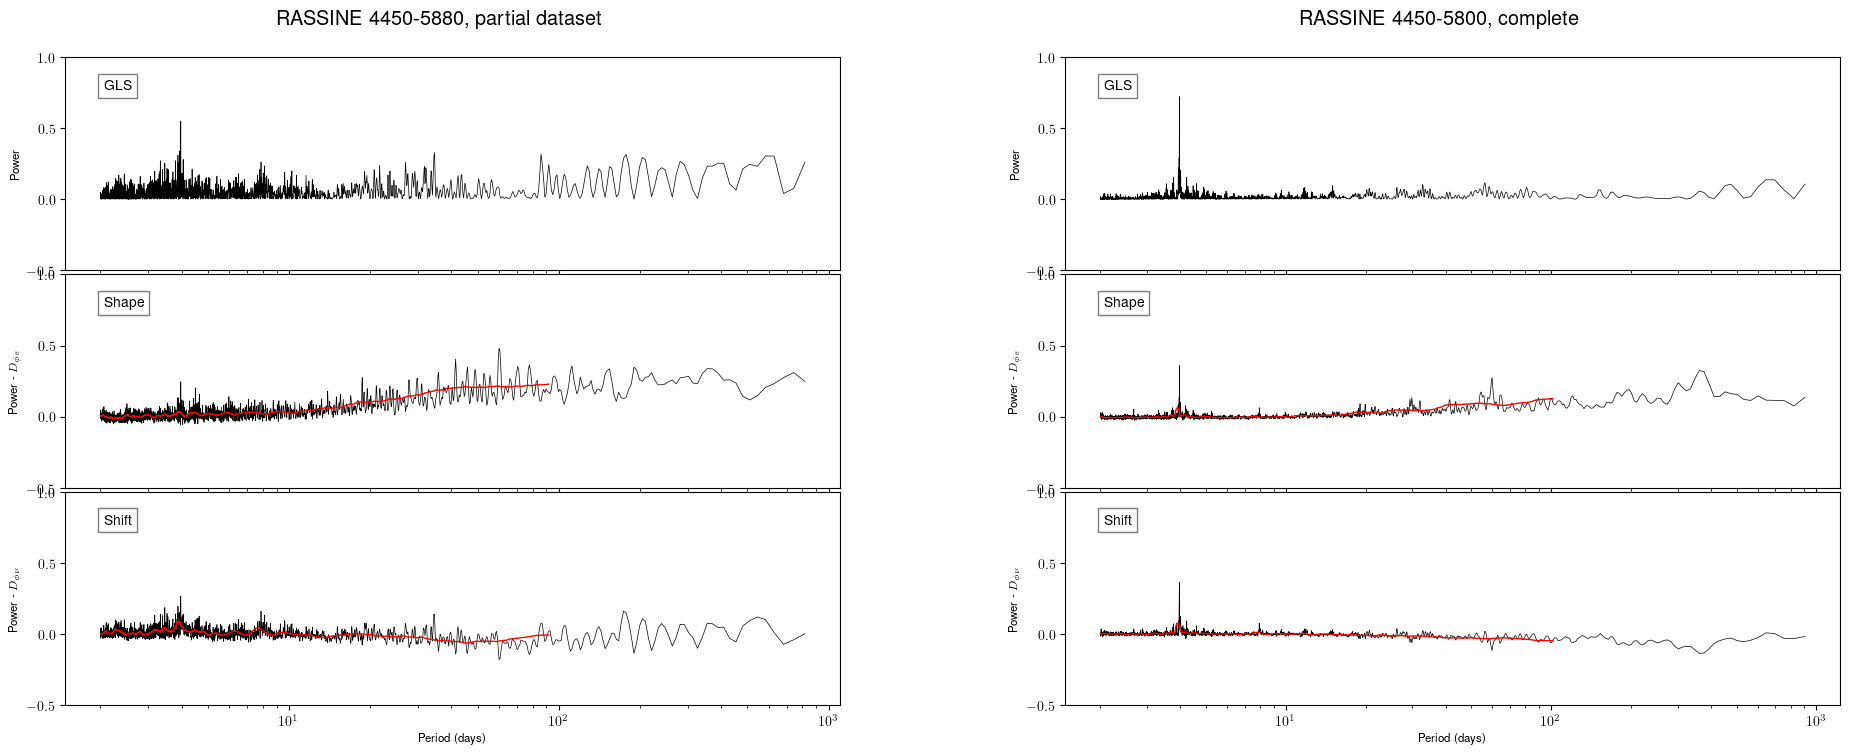

In [18]:
fig = plt.figure(constrained_layout=False, figsize=(20, 8))
fig.suptitle(r'SPARTA vs RASSINE Preprocessing', fontsize='x-large')

subfigs = fig.subfigures(1, 2)

for outerind, subfig in enumerate(subfigs.flat):
    if outerind==0:
        results = results_sparta
        subfig.suptitle(r'RASSINE 4450-5880, partial dataset', fontsize='x-large')
    else:
        results = results_rassine
        subfig.suptitle(r'RASSINE 4450-5800, complete', fontsize='x-large')
    axs = subfig.subplots(3, 1,sharex=True)
    for innerind, ax in enumerate(axs.flat):
        if innerind==0:
            ax.plot(results['period'],results['gls'],linewidth=0.5)
            ax.set_ylabel('Power', fontsize='small')
        elif innerind==1:
            ax.plot(results['period'],results['shape'],linewidth=0.5)
            #plot moving average
            ax.plot(results['period'],pd.Series(results['shape']).rolling(window=80).mean(),linewidth=1,color='red')
            ax.set_ylabel(r'Power - $D_{\phi s}$', fontsize='small')
        elif innerind==2:
            ax.plot(results['period'],results['shift'],linewidth=0.5)
            #plot moving average
            ax.plot(results['period'],pd.Series(results['shift']).rolling(window=80).mean(),linewidth=1,color='red')
            ax.set_ylabel(r'Power - $D_{\phi \nu}$', fontsize='small')
            ax.set_xlabel('Period (days)', fontsize='small')
        # Add a small text box
        text_box = f"{['GLS', 'Shape', 'Shift'][innerind]}"
        ax.text(0.05, 0.85, text_box, transform=ax.transAxes, bbox=dict(facecolor='white', alpha=0.5))
        ax.set_ylim(-0.5,1)
        # ax.set_xlim(0,1000)
        ax.set_xscale('log')
        ax.yaxis.set_major_locator(MaxNLocator(nbins=3))
plt.subplots_adjust(top=0.92, hspace=0.02, wspace=0.2)
# plt.savefig('alfUMi_rassine_4450_5880_partialVScomplete.png', dpi=300)
plt.show()

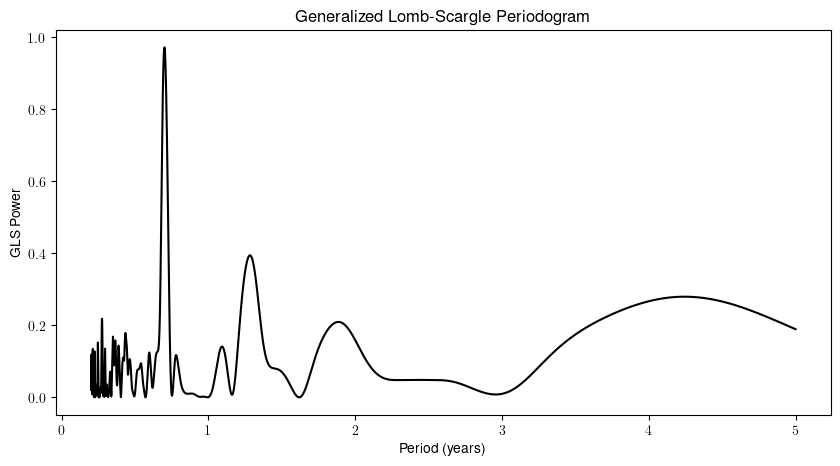

In [244]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.timeseries import LombScargle

# Generate synthetic data
np.random.seed(42)
baseline = 10  # years
num_observations = 28
times = np.sort(np.random.uniform(0, baseline, num_observations))
true_period = 0.7  # Adjust the true period as needed
true_amplitude = 1.5
y_true = true_amplitude * np.sin(2 * np.pi * times / true_period)
y_noisy = y_true + 0.3 * np.sin(np.random.randn(num_observations))

# Compute GLS periodogram
frequency = np.linspace(5,2/baseline,110000)
power = LombScargle(times, y_noisy,).power(frequency=frequency,method='slow')

# Convert frequency to period
periods = 1 / frequency

# # Plot the results
# plt.figure(figsize=(10, 5))
# plt.scatter(times, y_noisy, label='Noisy Data')
# plt.plot(times, y_true, label=f'True Signal (Period={true_period})', color='red')
# plt.xlabel('Time (years)')
# plt.ylabel('Amplitude')
# plt.legend()

plt.figure(figsize=(10, 5))
plt.plot(periods, power)
plt.xlabel('Period (years)')
plt.ylabel('GLS Power')
plt.title('Generalized Lomb-Scargle Periodogram')
plt.show()
